# <div align="center">Introduction to Tensorflow</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

Tensorflow is an open source numerical computing library for implementing production-ready machine learning models. It was originally developed by Google Brain team. Since it’s release it has been steadily taking over other deep learning libraries like Theano or Caffe.

Several high level user-friendly deep learning libraries like Keras, TfLearn have been built on top of tensorflow already. It’s flexible architecture allows users to create and deploy machine learning and deep learning models in CPU, GPU, distributed machines and even mobile devices. It also supports interfaces for many programming languages including Python and C++.

You can use Tensorflow Playground to see an implementation of a neural network in playground for practical experience. Google is using Tensorflow for search ranking, computer vision (Inception model), speech recognition, Youtube recommendations, machine translation for Google translate and in many other areas.

In this notebook , we'll explore tensorflow and work on a regression problem to predict Airbnb rental listing prices from Boston Airbnb Open Data. We'll learn about basic concepts of tensorflow like ***Tensors*** and ***computational graph***, learn how to execute simple programs and implement a linear regression model from scratch first. Then we will learn how to use the high level estimator API for quickly building and testing models on the Airbnb data.

## Tensorflow fundamentals

Tensorflow provides multiple API’s in different level of abstraction. The high level API’s like Keras, tf.estimator are built on top of the tensorflow core functionalities. Tensorflow estimators have been integrated with the core Tensorflow like Keras.

For users who just want to use the common models, Tensorflow provides pre-made estimators or “Canned Estimators” which refer to implementations of common machine learning models. We will use the canned estimators in this tutorial to predict airbnb rental prices with linear regression and learn how to use the estimator API. However, before using estimators we’ll go through the basic building blocks in tensorflow.

We can see how different parts fit into tensorflow architecture in this diagram:

<img src='assets/20190918/1.png'>

## Tensors and Computational Graphs

Tensors are the central unit of data in tensorflow. Tensors are like numpy arrays, we can conceptually think of them as the n-dimensional abstraction of matrices. A zero-dimensional tensor is a scalar or a constant. A 1-dimensional tensor is a list or vector. A 2-D tensor is same as a n x m matrix where n = rows and m = columns. Above that we can just say n-dimensional tensors.

These tensors are passed to operations that perform computations on them. An ***operation*** is commonly known as an ***op*** . Operations take zero or more tensors as inputs, performs computation with them and outputs zero or more tensors. For example, an operation like ***tf.add*** may take two inputs 3 and 5 and output their summation 8.

The tensors and the operations are connected to each other in a computational graph. A computational graph is defined by considering the operations as nodes and the tensors as edges. The operations are mathematical operations that are done on data and the data is passed to the operations with the tensors.

We can visualize a computational graph like this.

<img src='assets/20190918/2.png'>

Here we have two input tensors that pass the constants 5 and 3 to the add operation and the operation outputs 8.

## Constants and Running a Session :

In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


We will define two constant tensors a and b with tf.constant with constants 5 and 3 and add them up with tf.add as shown in the computational graph.

In [2]:
a = tf.constant(5,name = "a")
b = tf.constant(3, name = "b")
result = tf.add(a,b,name='add_a_b')
result

<tf.Tensor 'add_a_b:0' shape=() dtype=int32>

Unfortunately enough, our code has not produced the expected output. We can think of tensorflow core programs as having two distinct sections, first we have to define a computational graph that specifies the computations we want to do, then we have to run the code to get our actual results. We have defined our computational graph in this case, but we have not run the graph yet.

To evaluate result and get the output we have to run the code under a ***session***. A session takes a computational graph or part of a graph and executes it. It also holds the intermediate values and the results of performing the computation. We can create an instance of a session object from ***tf.Session class***.

In [3]:
sess = tf.Session()
sess.run(result)

8

## Variables and Placeholders

Since in machine learning we want to update the paramaters of the models when training, simply using constants whose values don't change is not enough, we need some mechanism to add trainable parameters to the computational graph. In Tensorflow we accomplish it using ***variables***. Variables require us to specify an ***initial value*** and the ***data type***. We create variables with the ***tf.variable*** op.

A graph can also be fed ***external inputs*** using ***placeholders*** so that we can feed arbitrary number of inputs from the training sets to the model. Placeholders act like tensor objects that do not have their values specified and are created using the op ***tf.placeholder***.

***Placeholder values must be fed when we run them***. We can use ***sess.run method's feed_dict argument*** to feed the values to the placeholders. We have to specifiy the shape and datatype of the placeholder when we add them to the graph. A shape of None indicates that the placeholder can get any arbitrary input.

***feed_dict*** is just a dictionary that maps graph elements like variables,constants or placeholders to values. We use it to overwrite the existing values of tensors. We can also use it to change variable values when running them.

In [4]:
c = tf.Variable(3,dtype=tf.float32)
d = tf.placeholder(dtype = tf.float32,shape=None)

Unlike constants, variables are not initialized when we call ***tf.Variable***. We'll have to run a special operation called ***tf.global_variables_initializer*** to initialize the variables by a session.

In [5]:
sess.run(tf.global_variables_initializer())
print(sess.run(c,feed_dict = {c:14}))
print(sess.run(d,feed_dict = {d:[1,1,3,5]}))

14.0
[1. 1. 3. 5.]


The variable c was initialized with 3, but we have changed it to 14 with the feed_dict parameter. The placeholders didn't have any specified value when we initialized it, but we fed it a list of values when we ran the code.

## Tensorboard

Tensorboard is a visualization tool that comes packaged with tensorflow.It’s very useful to visualize large scale machine learning models to debug them and understand what’s going on under the hood. With tensorboard we can also track our loss metrics and other values to see how they are changing over training steps.

For using tensorboard, we can save our graphs with by writing summaries about them with summary writers. Summaries are like condensed information about models. Tensorboard creates visualizations out of this information.

We have to pass the directory name where our graph log files will be saved and the computational graph we want to save into the summary writer object when calling it.. ***sess.graph*** contains the default computational graph for this session and writer writes it into the directory provided in logdir parameter.



In [6]:
writer = tf.summary.FileWriter(logdir= "../first_graph",graph = sess.graph)
writer.close()

In [8]:
# tensorboard --logdir=first_graph

Tensorboard’s default port is 6006. So if you go to http://localhost:6006/#graphs tensorboard will be there.

## Linear Regression From Scratch :

In a simple dataset with only one feature and one output to predict, the form of the equation looks like

<img src='assets/20190918/4.png'>

We can see that for different values of input X we can get the predictions by using the equation. We can also visualize it.

<img src='assets/20190918/5.png'>

We try to find out the best possible value for the weight and bias parameters using optimization technique against a loss function in order to fit a line through the data using the weight and the bias parameter when it comes to single feature.Loss functions tell us how good our predicted value is compared to the actual output. If we have n features the general equation is like this.

<img src='assets/20190918/6.png'>

## Introducing Tensorflow Estimators

As mentioned earlier, estimators is a high level API integrated with Tensorflow that allows us to work with pre-implemented models and provides tools for quickly creating new models as need by customizing them. The interface is loosely scikit-learn inspired and follows a train-evaluate-predict loop similar to scikit-learn. Estimators is the base class, canned estimators or pre-implemented models are the sub-class. We are using the canned estimators in this notebook.

Estimators deal with all the details of creating computational graphs, initializing variables, training the model and saving checkpoint and logging files for Tensorboard behind the scene. But to work with the estimators, we’ve to become comfortable with two new concepts, ***feature columns*** and ***input functions***. Input functions are used for passing input data to the model for training and evaluation. Feature columns are specifications for how the model should interpret the input data. We will cover the feature columns and input function in detail in the later sections.

Our general workflow will be to follow these steps :

* Loading the libraries and dataset.


* Data proprocessing.


* Defining the feature columns.


* Building input function.


* Model instantiation, training and evaluation.


* Generating prediction.


* Visualizing the model and the loss metrics using Tensorboard.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use("seaborn-colorblind")
%matplotlib inline
# only displays the most important warnings
tf.logging.set_verbosity(tf.logging.FATAL)

In [11]:
used_features = ['property_type','room_type','bathrooms','bedrooms','beds','bed_type','accommodates','host_total_listings_count'
                ,'number_of_reviews','review_scores_value','neighbourhood_cleansed','cleaning_fee','minimum_nights','security_deposit','host_is_superhost',
                 'instant_bookable', 'price']
boston = pd.read_csv('inputs/boston-airbnb-open-data/listings.csv', usecols = used_features)
print(boston.shape)
boston.head(2)

(3585, 17)


,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,NaN,$35.00,2,0,NaN,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,$95.00,$10.00,2,36,9.0,t


In [12]:
for feature in ["cleaning_fee","security_deposit","price"]:
    boston[feature] = boston[feature].map(lambda x:x.replace("$",'').replace(",",''),na_action = 'ignore')
    boston[feature] = boston[feature].astype(float)
    boston[feature].fillna(boston[feature].median(),inplace = True)
    
    
for feature in ["bathrooms","bedrooms","beds","review_scores_value"]:
    boston[feature].fillna(boston[feature].median(),inplace = True)
    
boston['property_type'].fillna('Apartment',inplace = True)

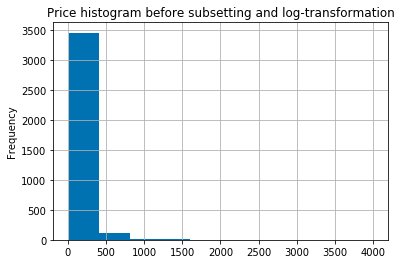

In [13]:
boston["price"].plot(kind = 'hist',grid = True)
plt.title("Price histogram before subsetting and log-transformation");

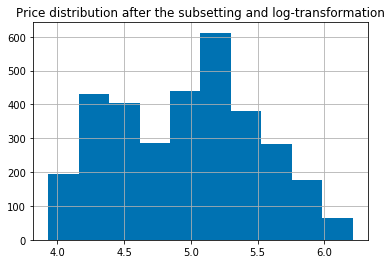

In [14]:
boston = boston[(boston["price"]>50)&(boston["price"]<500)]
target = np.log(boston.price)
target.hist()
plt.title("Price distribution after the subsetting and log-transformation");

In [15]:
features = boston.drop('price',axis=1)
features.head()

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.0,2,0,9.0,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,95.0,10.0,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,250.0,50.0,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,100.0,50.0,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,250.0,15.0,2,29,10.0,f


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     features, target, test_size=0.33, random_state=42)

In [17]:
# Get all the numeric feature names
numeric_columns = ['host_total_listings_count','accommodates','bathrooms','bedrooms','beds',
 'security_deposit','cleaning_fee','minimum_nights','number_of_reviews',
 'review_scores_value']
# Get all the categorical feature names that contains strings
categorical_columns = ['host_is_superhost','neighbourhood_cleansed','property_type','room_type','bed_type','instant_bookable']

In [19]:
numeric_features = [tf.feature_column.numeric_column(key = column) for column in numeric_columns]
print(numeric_features[0])

NumericColumn(key='host_total_listings_count', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [21]:
Property_type = ["apartment","condo","apartment","villa","house","house"]
gender_column = tf.feature_column.categorical_column_with_vocabulary_list(key = "Property_type",
                                                                          vocabulary_list = ["house",
                                                                                             "apartment",
                                                                                             "condo",
                                                                                             "villa"]
                                                                          )

In [23]:
categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list(key = column, 
                                                                                 vocabulary_list = features[column].unique()) 
                                                                                for column in categorical_columns]
print(categorical_features[3])

VocabularyListCategoricalColumn(key='room_type', vocabulary_list=('Entire home/apt', 'Private room', 'Shared room'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [24]:
linear_features = numeric_features + categorical_features

In [26]:
# Create training input function
training_input_fn = tf.estimator.inputs.pandas_input_fn(x = X_train,
                                                        y=y_train,
                                                        batch_size=32,
                                                        shuffle= True,
                                                        num_epochs = None)
# create testing input function
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                    y=y_test,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    num_epochs = 1)

In [27]:
linear_regressor = tf.estimator.LinearRegressor(feature_columns=linear_features,
                                                model_dir = "linear_regressor")

In [28]:
linear_regressor.train(input_fn = training_input_fn,steps=2000)

In [29]:
linear_regressor.evaluate(input_fn = eval_input_fn)
# print("Loss is " + str(loss))

{'average_loss': 0.1541931,
 'label/mean': 4.9762683,
 'loss': 4.8933635,
 'prediction/mean': 4.8580227,
 'global_step': 2000}

In [30]:
pred = list(linear_regressor.predict(input_fn = eval_input_fn))
pred = [p['predictions'][0] for p in pred]

In [31]:
prices = np.exp(pred)
print(prices)

[ 77.510826  85.06309   81.72188  ... 131.34215   65.034546 135.66397 ]
